In [1]:
import numpy as np
from prettytable import PrettyTable
import copy

In [2]:
class Cell:
    def __init__(self, value: int, vector: np.array):
        self.__value = value
        self.__vector = vector

    def __eq__(self, other):
        if isinstance(other, Cell):
            return self.value == other.value and np.all(self.vector == other.vector)
        return False

    def __ge__(self, other):
        if isinstance(other, list):
            return [self.__ge__(i) for i in other]
        return np.all(self.vector.__ge__(other.vector))

    def __add__(self, other):
        return Cell(self.value + other.value, self.vector + other.vector)

    def __str__(self):
        return str(self.value) + " " + str(self.vector)

    def __repr__(self):
        return str(self)

    @property
    def value(self):
        return self.__value

    @value.setter
    def value(self, value: int):
        self.__value = value

    @property
    def vector(self):
        return self.__vector

    @vector.setter
    def vector(self, vector: list[int]):
        self.__vector = vector

    @staticmethod
    def init_cells(coefficients: list[int]) -> list["Cell"]:
        cells = []
        n = len(coefficients)
        for i, v in enumerate(coefficients):
            vector = np.eye(1, n, i, dtype=np.int32)[0]
            cell = Cell(v, vector)
            cells.append(cell)
        return cells

In [3]:
class ResultCell:
    def __init__(self, cell: Cell, arrows: list[int], m: int):
        self.__cell = cell
        self.__arrows = arrows
        self.__m = m

    def __str__(self):
        m_str = ""
        if self.m < 0:
            m_str = "--> m" + str(-self.m)
        elif self.m > 0:
            m_str = ">= m" + str(self.m)
        return str(np.array(self.arrows)) + "\n" + str(self.cell) + "\n" + m_str

    def __repr__(self):
        return str(self)

    @property
    def cell(self):
        return self.__cell

    @cell.setter
    def cell(self, cell: Cell):
        self.__cell = cell

    @property
    def arrows(self):
        return self.__arrows

    @arrows.setter
    def arrows(self, arrows: list[int]):
        self.__arrows = arrows

    @property
    def m(self):
        return self.__m

    @m.setter
    def m(self, m: list[int]):
        self.__m = m

In [4]:
def calc_process_m(cell: Cell, result_basis: list[Cell]) -> int:
    if cell.value == 0:
        if cell not in result_basis:
            result_basis.append(cell)
        return -len(result_basis)
    l = np.where(cell >= result_basis)[0]
    m = l[0] + 1 if l.size > 0 else None
    if m is not None:
        return m
    return 0
    

def solve(coefficients: list[int]) -> tuple[list[list[ResultCell]], list[Cell]]:
    result_basis = []
    first = Cell.init_cells(coefficients)
    result = [[]]
    for cell in first:
        m = calc_process_m(cell, result_basis)
        result[0].append(ResultCell(cell, [], m))
    flag = True
    while flag:
        curr_result = []
        flag = False
        for step_i, result_cell in enumerate(result[-1]):
            if result_cell.m != 0:
                continue
            flag = True
            for first_i, f_cell in enumerate(first):
                if result_cell.cell.value * f_cell.value >= 0:
                    continue
                tmp = result_cell.cell + f_cell
                m = calc_process_m(tmp, result_basis)
                for i, v in enumerate(curr_result):
                    if tmp == v.cell:
                        curr_result[i].arrows += [step_i + 1]
                        break
                else:
                    curr_result.append(ResultCell(tmp, [step_i + 1], m))
        result.append(curr_result)
    return result[:-1], result_basis

In [5]:
def print_result(result: list[list[ResultCell]]):
    result_ = copy.deepcopy(result)
    n = max(map(len, result_))
    for r in result_:
        while len(r) < n:
            r.append("")

    table = PrettyTable()
    table.field_names = range(1, n + 1)
    for r in result_:
        table.add_row(r, divider=True)

    print(table)
    

def print_basis(basis: list[Cell]):
    print("Basis vectors:")
    for b_i, b_v in enumerate(basis):
        print(f"m{b_i + 1} = {b_v.vector}")

**Enter equation coefficients:**

*Input example:*\
```>> -1 1 2 -3```

In [6]:
s = input(">>")

>> -1 1 2 -3


In [7]:
input_nums = list(map(int, s.split()))
out_ = solve(input_nums)
print_result(out_[0])

+--------------+--------------+--------------+--------------+--------------+
|      1       |      2       |      3       |      4       |      5       |
+--------------+--------------+--------------+--------------+--------------+
|      []      |      []      |      []      |      []      |              |
| -1 [1 0 0 0] | 1 [0 1 0 0]  | 2 [0 0 1 0]  | -3 [0 0 0 1] |              |
|              |              |              |              |              |
+--------------+--------------+--------------+--------------+--------------+
|    [1 2]     |    [1 3]     |    [2 4]     |    [3 4]     |              |
| 0 [1 1 0 0]  | 1 [1 0 1 0]  | -2 [0 1 0 1] | -1 [0 0 1 1] |              |
|    --> m1    |              |              |              |              |
+--------------+--------------+--------------+--------------+--------------+
|     [2]      |     [2]      |     [3]      |    [3 4]     |     [4]      |
| 0 [2 0 1 0]  | -2 [1 0 1 1] | -1 [0 2 0 1] | 0 [0 1 1 1]  | 1 [0 0 2 1]  |

In [8]:
print_basis(out_[1])

Basis vectors:
m1 = [1 1 0 0]
m2 = [2 0 1 0]
m3 = [0 1 1 1]
m4 = [1 0 2 1]
m5 = [0 3 0 1]
m6 = [0 0 3 2]


**Handwritten version of the example:**

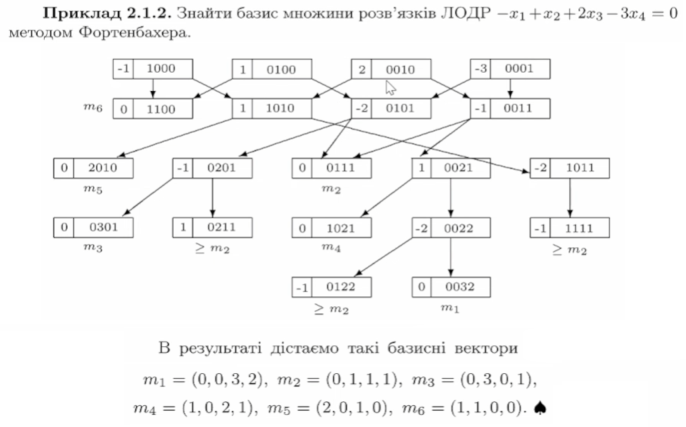